In [1]:
#!pip install matplotlib ipywidgets
#!pip install ipympl
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, HBox
from matplotlib.patches import Rectangle


def plot_sine_wave(L, ax=None):
    x = np.linspace(0, L, 100)  # Define x range
    y_1 = np.sqrt(2/L) * np.sin(1 * np.pi * x / L)
    y_2 = np.sqrt(2/L) * np.sin(2 * np.pi * x / L)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y_1, label="n = 1", color='red')
    ax.plot(x, y_2, label="n = 2", color='blue')
    ax.axhline(y=0, color='grey', linestyle='--', linewidth=0.5)  # Add light grey dotted line at y=0
    ax.set_ylim(-1, 1)  # Set y-axis limits
    ax.set_xlim(0, L)  # Set x-axis limits

    ax.set_title('Wave Function of n = 1 & 2')
    ax.set_xlabel('L')
    #ax.set_ylabel('y')
    ax.set_xlim(0, 5.3)
    ax.legend()

def plot_lines(y1, y2, x_position=0.5, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))  # Increase the size of the plot

    ax.axhline(y=y1, color='blue', linestyle='-', linewidth=2, label='n = 2')
    ax.axhline(y=y2, color='red', linestyle='-', linewidth=2, label='n = 1')

    # Draw vertical line between y1 and y2 at x_position
    ax.plot([x_position, x_position], [y1, y2], color='green', linestyle='--', linewidth=2)

    difference = abs(y1 - y2)
    mid_y = (y1 + y2) / 2
    text_x_position = x_position + .001
    ax.text(text_x_position, mid_y, f'{difference:.2f} eV', color='green', va='center', ha='left')

    # Hide x-axis
    #ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.set_ylim(0, 5)
    ax.set_ylabel('eV')
    ax.set_title('Energies')
    ax.legend()

"https://gist.github.com/friendly/67a7df339aa999e2bcfcfec88311abfc"
def wavelength_to_rgb(wavelength, gamma=0.8):
    if 380 <= wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif 440 < wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif 490 < wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif 510 < wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif 580 < wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif 645 < wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 1.0
        G = 1.0
        B = 1.0
        print("Your Color Is Outside The Visible Light Spectrum")

    R = int(R * 255)
    G = int(G * 255)
    B = int(B * 255)

    return (R, G, B)


def display_color(rgb_color):
    fig, ax = plt.subplots()
    ax.add_patch(Rectangle((0, 0), 1, 1, color=[c/255 for c in rgb_color]))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.show()


# WaveFunction


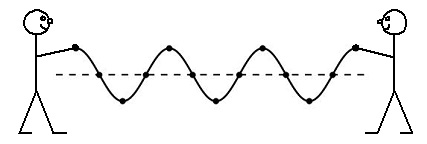

---
[Link to more information on transverse waves](https://www.physics.wisc.edu/ingersollmuseum/exhibits/waves/transverse/)


Let's think of two friends with a rope. They move their arms up and down to make waves that move along the rope. There are two things to think about:

1) The faster one of the person's arms moves, the more times the rope will cross the axis, and the harder the person will have to work.

2) If a person only wants the rope to cross the axis a set amount of times, and the friends get further apart (meaning a longer rope), the energy of the wave traveling on the rope decrease.

Plotting the 1D Particle In A Box
Interestingly enough, an electron acts just like a wave!
Let's limit our electron to only move in one-dimension (like a rope does).
Which electron would have more energy; n = 1 or n = 2?
What happens to the energy of the electron when you make the "rope" that it exists on longer? Vary the length (L) and try to guess what happens to the energy.

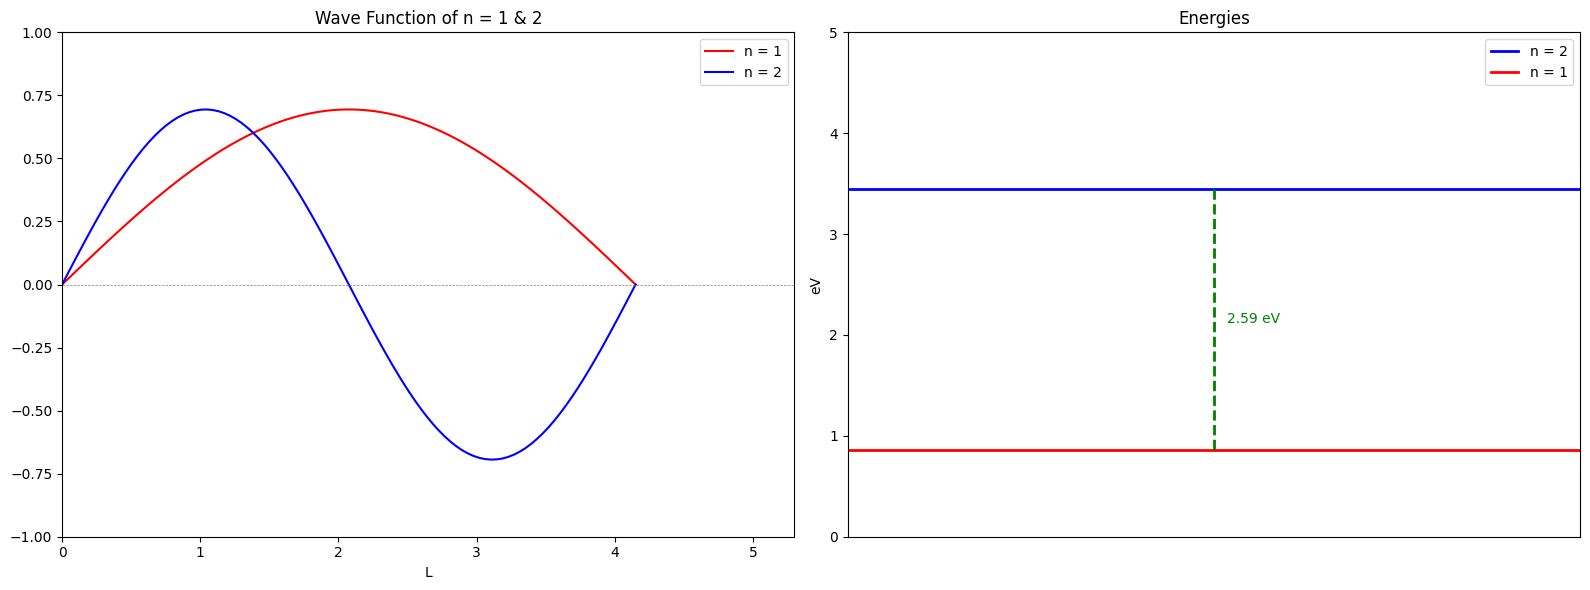

In [2]:

Length  = 4.15 # @param {type:"slider", min:3.68, max:5.3, step:0.01}

#Plot Wavefunction
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plot_sine_wave(Length, ax=ax1)



#Finding E
L = Length * 10**(-9)
n = 2
h = 6.626 * 10**(-34) #J/s
m = 9.109 * 10**(-31)  #Kg

E_2 = n**2 * np.pi**2 * h**2 / (2 * m *L**2)
n = 1
E_1 = n**2 * np.pi**2 * h**2 / (2 * m *L**2)



#Plot Energies
plot_lines(E_2 * 6.24*10**18, E_1 * 6.24*10**18, ax=ax2)

plt.tight_layout()
plt.show()


Similar to how the friends with a rope needed to work harder to get the rope to cross the axis more, since the 𝑛=2 electron crosses the axis more than the 𝑛=1 electron, it is higher in energy!

We call these "excited states" and can calculate their energy with the equation:

$E_n = \frac{n^2 \ π^2 \hbar^2 } {2mL^2}$ Let's look at the energies for your two electrons. How do the energies change when you change 𝐿? How does the difference in the energies change when you change 𝐿? I will calcuate the energy of your second excited state, you do the ground state!

Here is a list of things you may need:
$$ h = 6.626 \times 10^{-34} \ \text{J} \cdot \text{s    (Planck's Constant)} $$

$$ m = 9.109 \times 10^{-31} \ \text{kg    (mass of an electron)} $$

$$ L = \text{Rope Length in meters    } \text{(hint: the L from above is in nm)} $$

$$ 1.6 \times 10^{-19} \ \text{J}  =  1 \text{eV}$$



Energy of Your Second Excited State (n = 2/blueline)

In [3]:
L = Length * 10**(-9)
n = 2
h = 6.626 * 10**(-34) #J/s
m = 9.109 * 10**(-31)  #Kg

E_2 = n**2 * np.pi**2 * h**2 / (2 * m *L**2)

print(f"Your Second Excited State (n=2) in Electron Volts is {E_2 * 6.24*10**18:.1f} eV")


Your Second Excited State (n=2) in Electron Volts is 3.4 eV


Energy of Your Ground State (n=1/redline)

In [ ]:

n = 1
h = 6.626e-34
m = 9.109e-31
L = Length * 10**(-9)

E_1 = n**2 * np.pi**2 * h**2 / (2 * m * L**2)
E_1_eV = E_1 * 6.24e18

student_answer = float(input("What is the energy of the ground state (n=1) in eV? "))

tolerance = 0.3
if abs(student_answer - E_1_eV) < tolerance:
    print(f"✅ Correct!  The Energy of the ground state is {E_1_eV:.1f} eV")
else:
    print(f"❌ Incorrect. Try again. (Hint: it's around be sure to check your units!)")

Energy Diffrences

In [ ]:

d_E = E_2 - E_1

d_E_eV = d_E*  6.24e18

# Student input
student_dE = float(input("What is the energy difference between E_2 and E_1 in eV?"))

# Check if correct (allowing small rounding error)
tolerance = 0.1

if abs(student_dE - d_E_eV) < tolerance:
    print(f"✅ Correct!  The Energy Diffrence is {d_E_eV:.1f} eV")
else:
    print(f"Try again")


# Why do we care about energy levels?



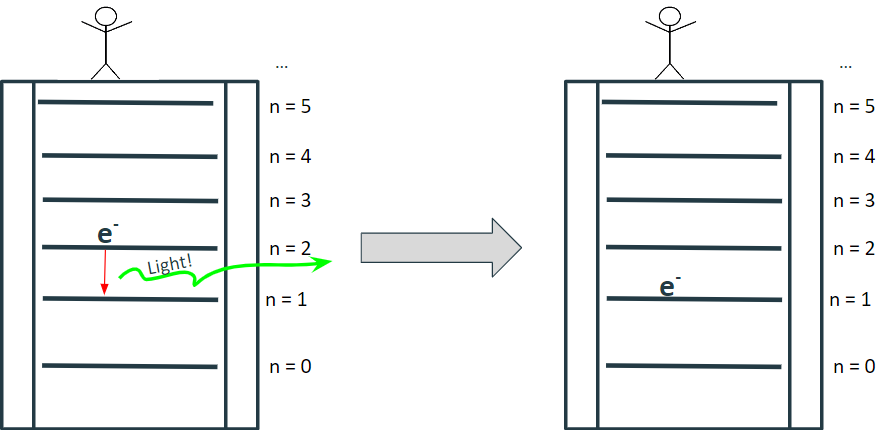

A common way to think about electrons and how they transition is that they are on rungs of a ladder. Electrons cannot exist anywhere but on those rungs; this means in order to move, they need to absorb or get rid of the ***exact amount*** of energy required. This energy is in the form of light, where the color emitted or absorbed can be calculated from the energy gap between rungs.


Thankfully energy and light are very closely related! In fact, their relationship can be described by the following equation, $E = \frac{hc}{\lambda}$ where $h$ is Planck's constant ($6.5 \times 10^{-16} \, \text{eV} \cdot \text{s}$), $c$ is the speed of light in a vacuum ($3 \times 10^{8} \, \text{m/s}$), and $\lambda$ is the wavelength of light!


Our eyes have evolved in order to view all wavelengths of light between ~375-800 nm as color!


[Link to more info on light](https://https://healthlighting.com/blogs/lighting-guide/guide-to-the-spectrum-of-light)

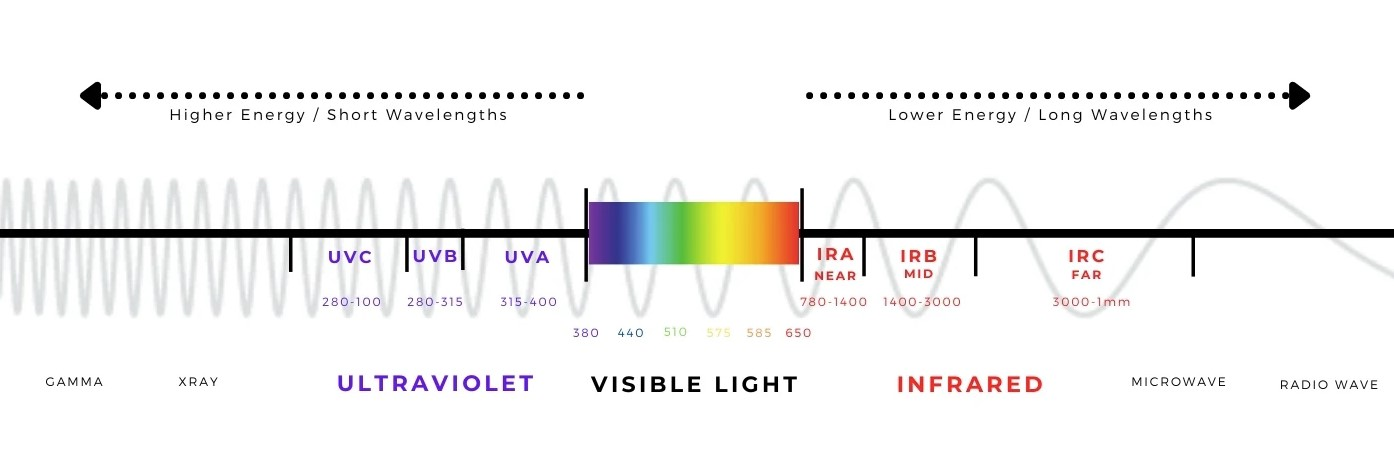


Let's think back to our electron on a now, imagining that the particle is transitioning from 𝑛=2 to 𝑛=1, what color would that be? What happens when we increase or decrease the length of the box, does the color emitted change?




What is the wavelength of the light emiited from a n=2 -> n = 1 transition in nanometers?

In [ ]:

#E= hc/λ
c = 3 * 10**8
lam = h * c / d_E

lam_nm = lam * 10**9
#print("In nanometers: " +  str(lam * 10**9))



# Student input
student_lam_nm = float(input("What is the Wavelength of light?"))

# Check if correct (allowing small rounding error)
tolerance = 20

if abs(lam_nm - student_lam_nm) < tolerance:
    print(f"✅ Correct!  The Energy Diffrence is {lam_nm:.1f} eV")
else:
    print(f"Try again")

In [ ]:
# @title What Color Is that?

display_color(wavelength_to_rgb(lam * 10**9))